# The Chaos Game (Lab 2)

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-0qx1inut
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-0qx1inut
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5914 sha256=98148817e4bbc5f3fb10ac43aca750eaa5574fe767a7c91d48a0dd5349782b20
  Stored in directory: /tmp/pip-ephem-wheel-cache-1en98vic/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


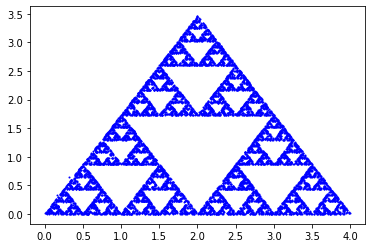

In [2]:
#defines the midpoint (P, Q) and generates the midpoint.
def midpoint(P, Q):
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1]))

#defines the verticies of the figure, thereby creating a triangle.
vertices = [(0, 0), (2, 2*np.sqrt(3)), (4, 0)]

#n is the amount of times the function is iterated. This creates a more intricate fractal.
n = 10000

#This generates a random point from the figure. Be sure to define the vertices before this is done. 
x = [0]*n
y = [0]*n
x[0] = random()
y[0] = random()

#This is the code that takes that randomly generated point and calculates the midpont between that and a randomly chosen vertex.
for i in range (1, n):
  x[i], y[i] = midpoint( vertices[randint(0, 2)], (x[i-1], y[i-1]) )

#This plots the triangle so we're able to appreciate it. s defines the scalar which allows us to see more detail with the higher number of iterations.
plt.scatter(x, y, color = 'b', s=1)

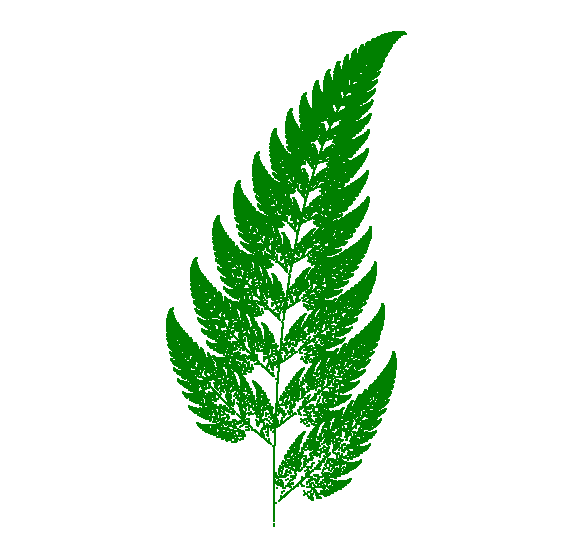

In [3]:
#defines a random sum from the cumulation of sums
def pick(p):
    c = np.cumsum(p)
    return bisect(c, np.random.random() * c[-1])

#This is assigning probability to the equations below.
p = np.array([0.01,0.07,0.07,0.85])

#Equations to be executed.
eq = [np.array([[0,0,0],[0,0.16,0]]), #previous states that this has a 1% probability of x being 0 and y being .16
      np.array([[0.2,-0.26,0],[0.23,0.22,1.6]]), #previous states that this has a 7% probabilty of these coordinates being used...
      np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]]), #7% probability...
      np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])] #85% probabilty...

#n is amount of times equation is iterated.
n = 100000
x = np.zeros((n,3))
x[:,2] = 1

#this function is used to find the vaules from random probability
for i in range(1,n):
    x[i,:2] = np.matmul(eq[pick(p)],x[i-1,:])

#this function plots the figure
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:, 1], s=3, c="g", marker="s", linewidths=0)
plt.axis("equal"),plt.axis("off");